In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset
df = pd.read_csv('telco-customer-churn.csv')

In [3]:
# display the first few rows and the structure of the dataframe
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#The TotalCharges column is supposed to be numeric, but it's currently stored as a object. I need to change its data type to numeric.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [6]:
#Understand the dataset structure and identify categorical and numerical features.

# Check for missing values
print(df.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [7]:
df[['tenure','MonthlyCharges','TotalCharges']]

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


In [8]:
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [9]:
# The TotalCharges column seems to have values very similar to the product of tenure and monthlycharges. 
# However, since the tenure values for rows with missing values are all 0,
# I filled the missing values with 0

df = df.fillna(0)

In [10]:
# Get summary statistics for numerical features
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2279.734304
std         0.368612    24.559481       30.090047   2266.794470
min         0.000000     0.000000       18.250000      0.000000
25%         0.000000     9.000000       35.500000    398.550000
50%         0.000000    29.000000       70.350000   1394.550000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000


Text(0.5, 1.0, 'Total_Charges')

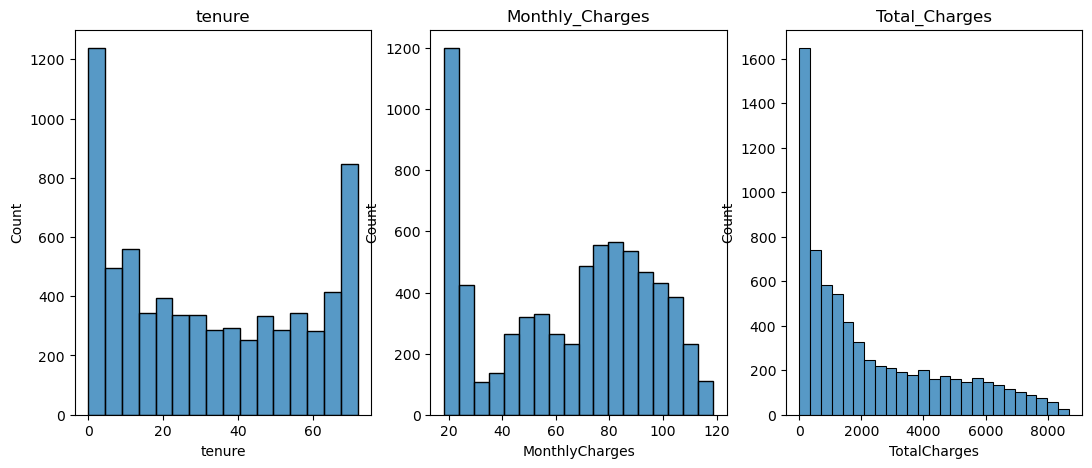

In [11]:
# check numeric data

fig, axes = plt.subplots(1,3, figsize=(13,5))

sns.histplot(data=df, x='tenure', ax=axes[0])
sns.histplot(data=df, x='MonthlyCharges', ax=axes[1])
sns.histplot(data=df, x='TotalCharges', ax=axes[2])

axes[0].set_title('tenure')
axes[1].set_title('Monthly_Charges')
axes[2].set_title('Total_Charges')

In [12]:
# check the unique values for categorical features

for column in df.select_dtypes(include=['object']).columns:
    print(f'{column}: {df[column].nunique()}')

customerID: 7043
gender: 2
Partner: 2
Dependents: 2
PhoneService: 2
MultipleLines: 3
InternetService: 3
OnlineSecurity: 3
OnlineBackup: 3
DeviceProtection: 3
TechSupport: 3
StreamingTV: 3
StreamingMovies: 3
Contract: 3
PaperlessBilling: 2
PaymentMethod: 4
Churn: 2


In [13]:
# drop the customerID column as it seems unnecessary.

df = df.drop('customerID', axis=1)

/var/folders/b4/z3dxswzd05s0815x3z3nkgsc0000gn/T/ipykernel_97626/4071337568.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='Set2')


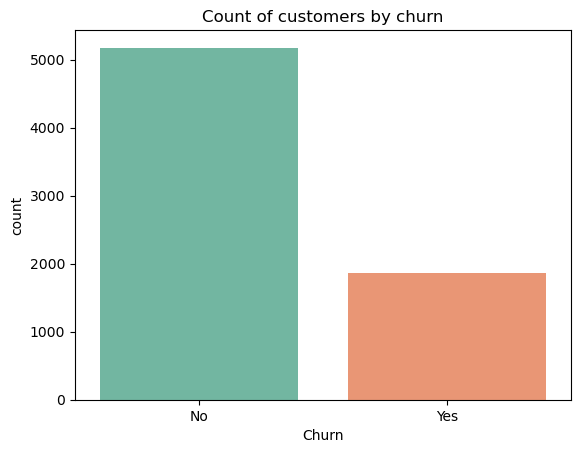

In [14]:
# display count of customers by churn

sns.countplot(x='Churn', data=df, palette='Set2')
plt.title('Count of customers by churn')
plt.show()

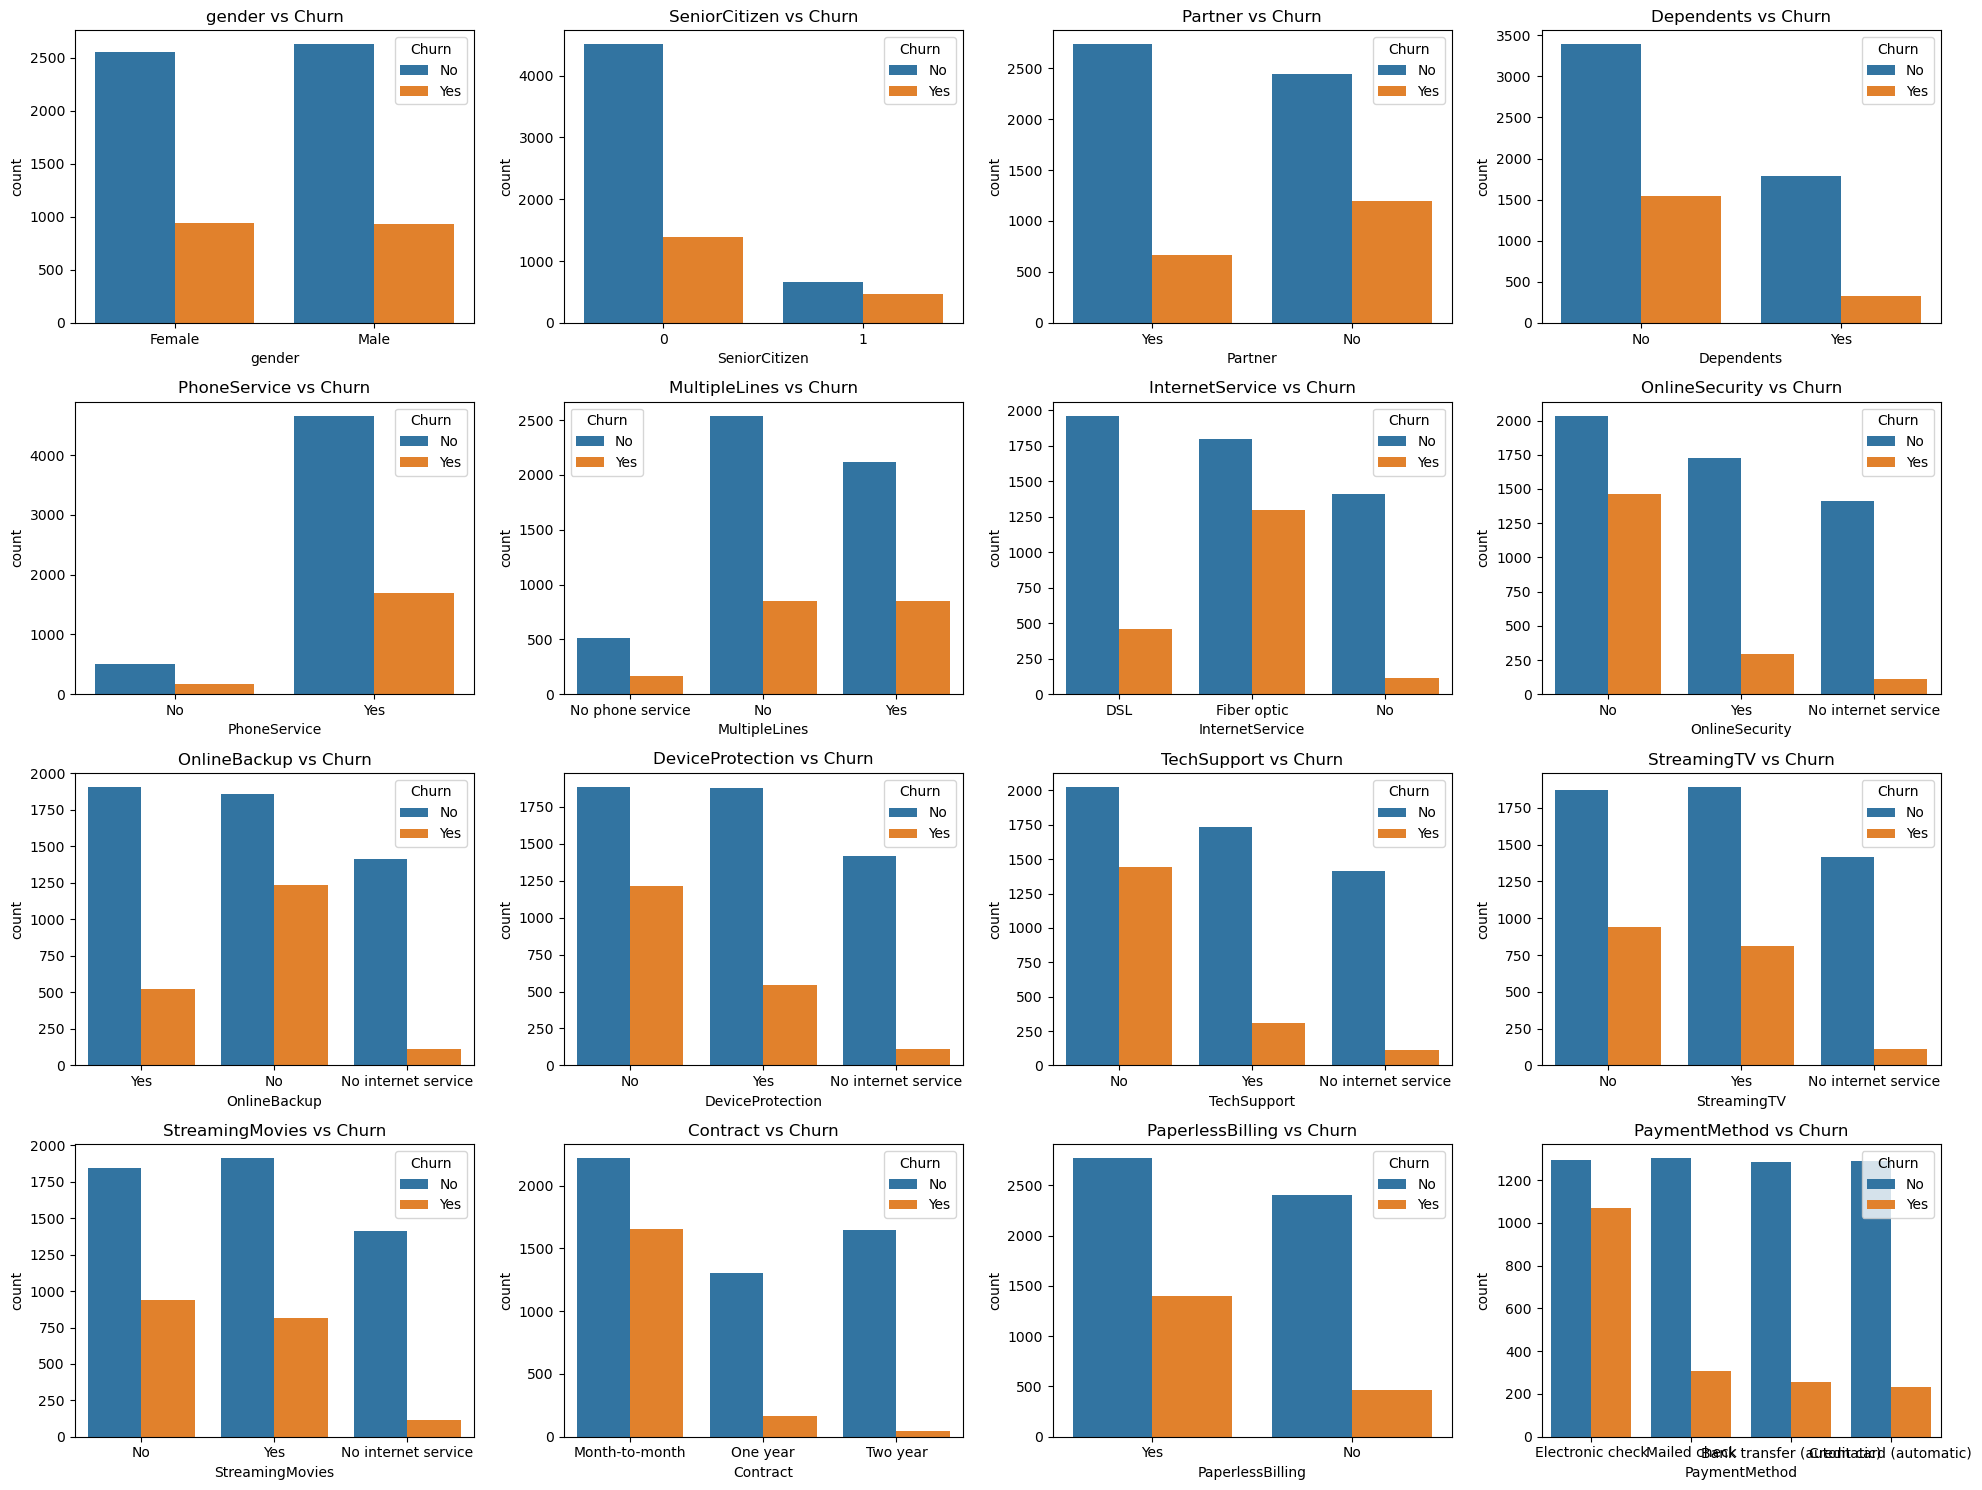

In [15]:
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

plt.figure(figsize=(20, 15))
for i, column in enumerate(categorical_columns):
    plt.subplot(4, 4, i + 1)
    sns.countplot(data=df, x=column, hue='Churn')
    plt.title(f'{column} vs Churn')
plt.tight_layout()
plt.show()

In [16]:
# transform Categorical Features

df = pd.get_dummies(df, drop_first = True)


In [17]:
# convert boolean variables into numerical values

boolean_columns = df.iloc[:, 4:].select_dtypes(include=['bool']).columns
df[boolean_columns] = df[boolean_columns].astype(int)
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


In [18]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Generate a correlation matrix to examine the relationship between 'Churn_Yes' and other features.
churn_correlation = correlation_matrix['Churn_Yes'].sort_values(ascending=False)

print(churn_correlation)


Churn_Yes                                1.000000
InternetService_Fiber optic              0.308020
PaymentMethod_Electronic check           0.301919
MonthlyCharges                           0.193356
PaperlessBilling_Yes                     0.191825
SeniorCitizen                            0.150889
StreamingTV_Yes                          0.063228
StreamingMovies_Yes                      0.061382
MultipleLines_Yes                        0.040102
PhoneService_Yes                         0.011942
gender_Male                             -0.008612
MultipleLines_No phone service          -0.011942
DeviceProtection_Yes                    -0.066160
OnlineBackup_Yes                        -0.082255
PaymentMethod_Mailed check              -0.091683
PaymentMethod_Credit card (automatic)   -0.134302
Partner_Yes                             -0.150448
Dependents_Yes                          -0.164221
TechSupport_Yes                         -0.164674
OnlineSecurity_Yes                      -0.171226


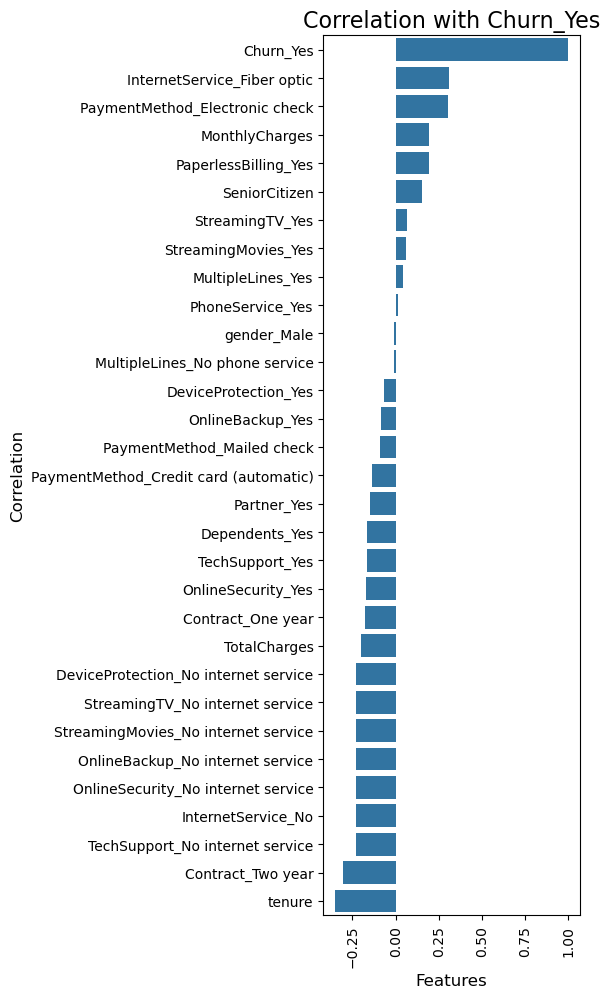

In [19]:
#display importance feature
plt.figure(figsize=(6, 10))
sns.barplot(x=churn_correlation.values, y=churn_correlation.index)


plt.title('Correlation with Churn_Yes', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

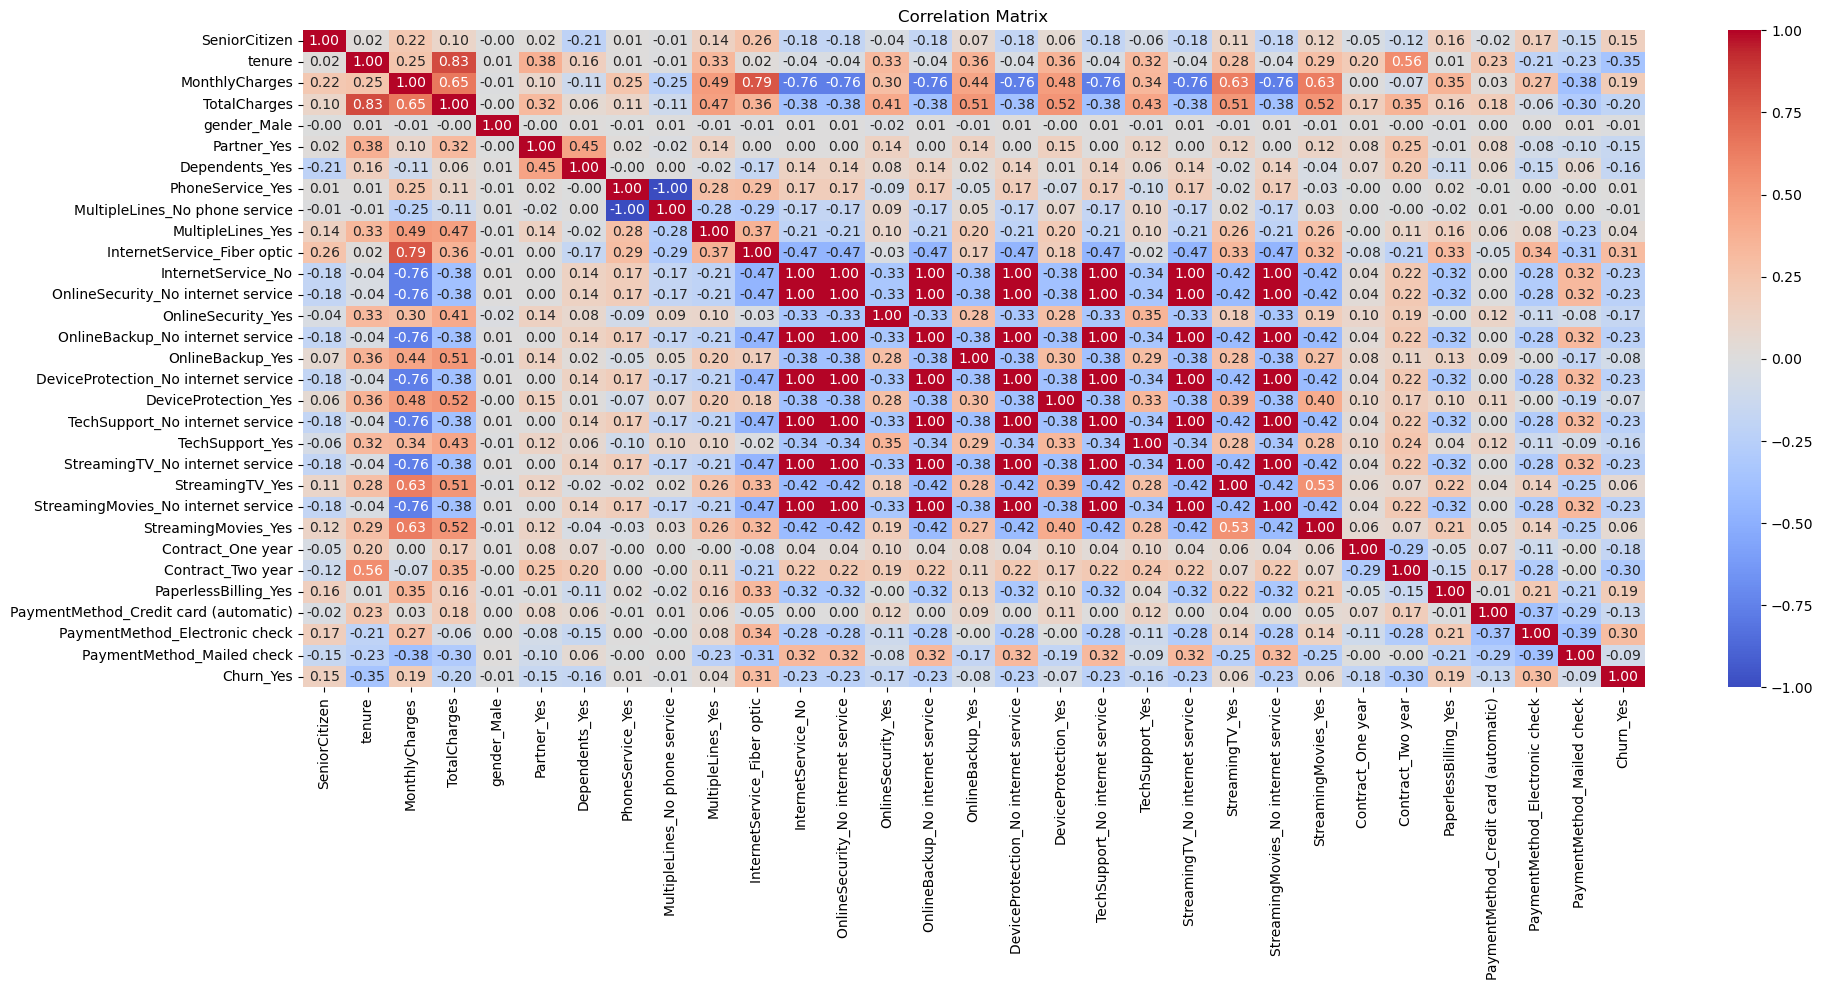

In [20]:
# check the correlation
correlation_matrix = df.corr()

plt.figure(figsize=(20,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [22]:
# Split the dataset into training and test datasets (80/20 ratio). 

from sklearn.model_selection import train_test_split


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_df = scaler.fit_transform(df[['tenure','MonthlyCharges','TotalCharges']])

In [24]:
scaled_df = pd.DataFrame(scaled_df, columns= ['tenure', 'MonthlyCharges', 'TotalCharges'])

In [25]:
scaled_df 

,tenure,MonthlyCharges,TotalCharges
0,-1.277445,-1.160323,-0.992611
1,0.066327,-0.259629,-0.172165
2,-1.236724,-0.362660,-0.958066
3,0.514251,-0.746535,-0.193672
4,-1.236724,0.197365,-0.938874
...,...,...,...
7038,-0.340876,0.665992,-0.127605
7039,1.613701,1.277533,2.242606
7040,-0.870241,-1.168632,-0.852932
7041,-1.155283,0.320338,-0.870513


In [26]:
print("Means after scaling:\n", scaled_df.mean())
print("\nStandard deviations after scaling:\n", scaled_df.std())

Means after scaling:
 tenure           -2.421273e-17
MonthlyCharges   -6.406285e-17
TotalCharges     -3.783239e-17
dtype: float64

Standard deviations after scaling:
 tenure            1.000071
MonthlyCharges    1.000071
TotalCharges      1.000071
dtype: float64


In [28]:
df.drop(['tenure', 'MonthlyCharges','TotalCharges'], axis=1, inplace=True)

In [29]:
df = pd.concat([df, scaled_df],axis=1)

In [30]:
df

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,-1.277445,-1.160323,-0.992611
1,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0.066327,-0.259629,-0.172165
2,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,1,-1.236724,-0.362660,-0.958066
3,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0.514251,-0.746535,-0.193672
4,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,1,0,1,-1.236724,0.197365,-0.938874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,1,1,0,1,0,0,0,...,1,0,1,0,0,1,0,-0.340876,0.665992,-0.127605
7039,0,0,1,1,1,0,1,1,0,0,...,1,0,1,1,0,0,0,1.613701,1.277533,2.242606
7040,0,0,1,1,0,1,0,0,0,0,...,0,0,1,0,1,0,0,-0.870241,-1.168632,-0.852932
7041,1,1,1,0,1,0,1,1,0,0,...,0,0,1,0,0,1,1,-1.155283,0.320338,-0.870513


In [31]:
X = df.drop('Churn_Yes', axis=1)
y = df['Churn_Yes']

In [32]:
# Divide the dataset into 80% training set and 20% testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 2024)

In [33]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=2024)

# Over Sampling
ros_X_train, ros_y_train = ros.fit_resample(X_train, y_train)

# check the result
print(ros_y_train.value_counts())

Churn_Yes
0    4123
1    4123
Name: count, dtype: int64


In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [35]:
rosNB_model = GaussianNB()
rosNB_model.fit (ros_X_train, ros_y_train)

GaussianNB()

In [36]:
NB_pred = NB_model.predict(X_test)
rosNB_pred = rosNB_model.predict(X_test)

In [37]:
def evaluate_model(y_true, y_pred, model_name="Model"):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print(f'{model_name} Accuracy: {accuracy:.2f}')
    print(f'{model_name} Precision: {precision:.2f}')
    print(f'{model_name} Recall: {recall:.2f}')
    print(f'{model_name} F1-score: {f1:.2f}')


In [38]:
evaluate_model(y_test, NB_pred, model_name='NaiveBayes')
evaluate_model(y_test, rosNB_pred, model_name = 'NaiveBayes_oversampled')

NaiveBayes Accuracy: 0.69
NaiveBayes Precision: 0.45
NaiveBayes Recall: 0.89
NaiveBayes F1-score: 0.59
NaiveBayes_oversampled Accuracy: 0.68
NaiveBayes_oversampled Precision: 0.44
NaiveBayes_oversampled Recall: 0.92
NaiveBayes_oversampled F1-score: 0.59


In [39]:
from sklearn.linear_model import LogisticRegression

lrmodel = LogisticRegression()

lrmodel.fit(X_train, y_train)

LogisticRegression()

In [40]:
roslrmodel = LogisticRegression()

roslrmodel.fit(ros_X_train, ros_y_train)

LogisticRegression()

In [41]:
lrpred = lrmodel.predict(X_test)
roslrpred = roslrmodel.predict(X_test)

In [42]:
evaluate_model(y_test, lrpred, model_name='LogisticRegression')
evaluate_model(y_test, roslrpred, model_name='LogisticRegression_over sampled')

LogisticRegression Accuracy: 0.80
LogisticRegression Precision: 0.64
LogisticRegression Recall: 0.54
LogisticRegression F1-score: 0.58
LogisticRegression_over sampled Accuracy: 0.76
LogisticRegression_over sampled Precision: 0.51
LogisticRegression_over sampled Recall: 0.82
LogisticRegression_over sampled F1-score: 0.63


In [43]:
lr_model = LogisticRegression(
    class_weight='balanced',  
    C=0.1,                    
    solver='liblinear',       
    max_iter=200              
)

lr_model.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)

In [44]:
evaluate_model(y_test, lr_pred, model_name='Logistic Regression')

Logistic Regression Accuracy: 0.76
Logistic Regression Precision: 0.52
Logistic Regression Recall: 0.82
Logistic Regression F1-score: 0.64


In [45]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier()

RF_model.fit(X_train, y_train)

RandomForestClassifier()

In [46]:
rosRF_model = RandomForestClassifier()
rosRF_model.fit(ros_X_train, ros_y_train)

RandomForestClassifier()

In [47]:
RF_pred = RF_model.predict(X_test)
rosRF_pred = rosRF_model.predict(X_test)

In [48]:
evaluate_model(y_test, RF_pred, model_name='Random Forest')
evaluate_model(y_test, rosRF_pred, model_name='Random Forest over sampled')

Random Forest Accuracy: 0.79
Random Forest Precision: 0.62
Random Forest Recall: 0.45
Random Forest F1-score: 0.52
Random Forest over sampled Accuracy: 0.78
Random Forest over sampled Precision: 0.57
Random Forest over sampled Recall: 0.54
Random Forest over sampled F1-score: 0.56


In [49]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [50]:
xgb_pred = xgb_model.predict(X_test)

In [52]:
osxgb_model = XGBClassifier()
osxgb_model.fit(ros_X_train, ros_y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [54]:
osxgb_pred = osxgb_model.predict(X_test)

In [56]:
evaluate_model(y_test, xgb_pred, model_name='XGBoost')
evaluate_model(y_test, osxgb_pred, model_name='XGBoost over sampled')

XGBoost Accuracy: 0.79
XGBoost Precision: 0.61
XGBoost Recall: 0.50
XGBoost F1-score: 0.55
XGBoost over sampled Accuracy: 0.76
XGBoost over sampled Precision: 0.53
XGBoost over sampled Recall: 0.64
XGBoost over sampled F1-score: 0.58


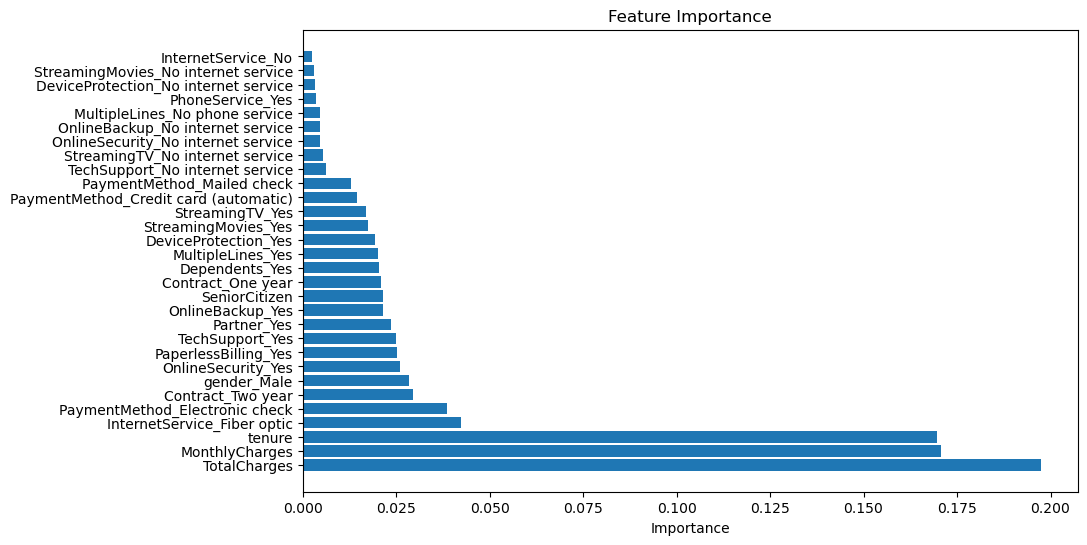

In [58]:
importances = RF_model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()


In [60]:
X = X.drop(columns=[col for col in df.columns if 'ervice' in col.lower()])

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 2024)

In [64]:
RF2_model = RandomForestClassifier()

In [66]:
RF2_model.fit(X_train, y_train)

RandomForestClassifier()

In [67]:
RF2_pred = RF2_model.predict(X_test)

In [68]:
evaluate_model(y_test, RF2_pred, model_name='RandomForest')

RandomForest Accuracy: 0.79
RandomForest Precision: 0.62
RandomForest Recall: 0.44
RandomForest F1-score: 0.52


In [72]:
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier(random_state=2024)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}
Best Cross-Validation Score: 0.8029801371471439


In [73]:
RF3_model = RandomForestClassifier(max_depth= 10, min_samples_split= 5, n_estimators= 50)

In [74]:
RF3_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=50)

In [75]:
RF3_pred = RF3_model.predict(X_test)

In [76]:
evaluate_model(y_test, RF3_pred, model_name='RandomForest')

RandomForest Accuracy: 0.80
RandomForest Precision: 0.66
RandomForest Recall: 0.45
RandomForest F1-score: 0.54


In [77]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'n_estimators': [50, 100, 200]
}

xgb = XGBClassifier(objective='binary:logistic', random_state=2024)
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='recall', cv=5, n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Recall Score:", grid_search.best_score_)

best_xgb_model = grid_search.best_estimator_
xgb_pred = best_xgb_model.predict(X_test)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.6}
Best Recall Score: 0.5413830787052215
